<a href="https://colab.research.google.com/github/raghdiness/Student-Performance/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Student Performance/StudentsPerformance.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df['high_math_score'] = df['math score'] >= 70
df['high_math_score'] = df['high_math_score'].astype(int)


In [11]:

df['gender'] = df['gender'].map({'female': 0, 'male': 1})

# Get dummies for all other categorical columns
df = pd.get_dummies(df, columns=[
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
], drop_first=True)



In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df.drop(['math score', 'reading score', 'writing score', 'high_math_score'], axis=1)
y = df['high_math_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.78      0.75       122
           1       0.61      0.55      0.58        78

    accuracy                           0.69       200
   macro avg       0.67      0.66      0.67       200
weighted avg       0.69      0.69      0.69       200



In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       122
           1       0.48      0.44      0.46        78

    accuracy                           0.59       200
   macro avg       0.57      0.57      0.57       200
weighted avg       0.59      0.59      0.59       200



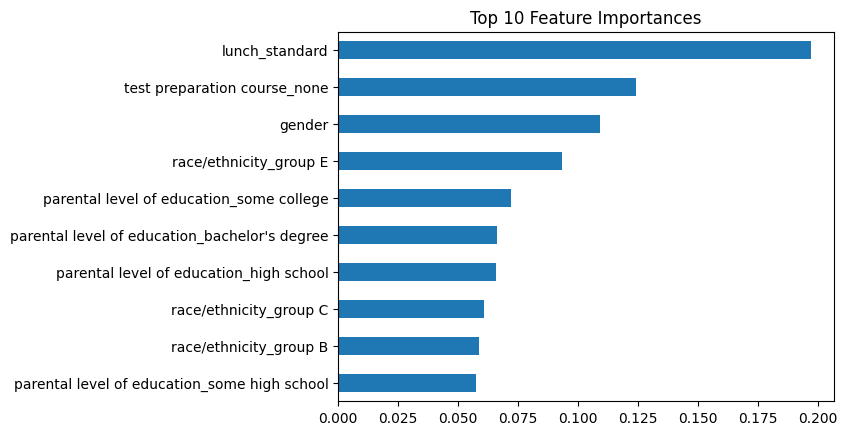

In [15]:
import matplotlib.pyplot as plt

# After model.fit(...)
importances = model.feature_importances_
feature_names = X.columns

# Plot top 10
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)
feat_imp[:10].plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.gca().invert_yaxis()
plt.show()


In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [18]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66       122
           1       0.64      0.66      0.65       115

    accuracy                           0.65       237
   macro avg       0.65      0.65      0.65       237
weighted avg       0.65      0.65      0.65       237

